In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# general packages
import numpy as np                         # math/array operations
import pandas as pd                        # data structures
import glob                                # file path search
from pathlib import Path                   # file path info.
import matplotlib.pyplot as plt            # plotting graphs
import warnings
warnings.filterwarnings('ignore')


# machine learning packages
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


#!pip install xgboost
import xgboost

pd.set_option('display.max_columns', 100)


In [2]:
print('numpy version is: {}'.format(np.__version__))
print('pandas version is: {}'.format(pd.__version__))
print('scikit-learn version is: {}'.format(sklearn.__version__))
print('xgboost version is: {}'.format(xgboost.__version__))

numpy version is: 1.26.4
pandas version is: 2.2.3
scikit-learn version is: 1.2.2
xgboost version is: 2.0.3


In [3]:
# load in the train and test data
train1= pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test1= pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')

# get shape for train and test data
print('-'*50)
print('the shape of the training data is: {}'.format(train1.shape))
print('-'*50)
print('the shape of the test data is: {}'.format(test1.shape))
print('-'*50)

--------------------------------------------------
the shape of the training data is: (1460, 81)
--------------------------------------------------
the shape of the test data is: (1459, 80)
--------------------------------------------------


In [4]:
# look at the column types
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# look at the first 30 rows of training df
train1.head(30)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [6]:
# find out how many unique values for each column
train1.nunique().sort_values(ascending= False)

Id            1460
LotArea       1073
GrLivArea      861
BsmtUnfSF      780
1stFlrSF       753
              ... 
HalfBath         3
Street           2
CentralAir       2
Utilities        2
Alley            2
Length: 81, dtype: int64

In [7]:
# find the null values for training
train1.isnull().sum().sort_values(ascending= [False])[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [8]:
# find the null values
test1.isnull().sum().sort_values(ascending= [False])[0:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
BedroomAbvGr       0
dtype: int64

In [9]:
# remove columns that have more than 10% null
remove1= list(train1.isnull().sum().sort_values(ascending= [False])[0:7].index)
#remove1.append('Id')
print(remove1)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage']


In [10]:
# verify the columns were removed
train2= train1.drop(columns= remove1)
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [11]:
# remove columns from test
test2= test1.drop(columns= remove1)
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [12]:
# split the training into training and validation

# split the target= SalePrice from Xs
y1= train2['SalePrice']
x1= train2.drop(['SalePrice'], axis= 1)
x_test1= test2

x_train1, x_val1, y_train, y_val= train_test_split(x1, y1, test_size= 0.2, shuffle= True, random_state= 24)

#get the id column
id_train= x_train1['Id']
id_val= x_val1['Id']
id_test= x_test1['Id']

# get the df for fitting (drop the id column)
x_train= x_train1.drop('Id', axis= 1)
x_val= x_val1.drop('Id', axis= 1)
x_test= x_test1.drop('Id', axis= 1)

#fix the index for everything
x_train= x_train.reset_index(drop= True)
x_val= x_val.reset_index(drop= True)
x_test= x_test.reset_index(drop= True)
y_train= y_train.reset_index(drop= True)
y_val= y_val.reset_index(drop= True)


# check the shape for all df
print('the shape of x_train is: {}'.format(x_train.shape))
print('the shape of x_val is: {}'.format(x_val.shape))
print('the shape of x_test is: {}'.format(x_test.shape))
print('the shape of y_train is: {}'.format(y_train.shape))
print('the shape of y_val is: {}'.format(y_val.shape))



the shape of x_train is: (1168, 72)
the shape of x_val is: (292, 72)
the shape of x_test is: (1459, 72)
the shape of y_train is: (1168,)
the shape of y_val is: (292,)


In [13]:
# get columns with null values for training
print(x_train.isnull().sum().sort_values(ascending= [False])[0:13])
trainnull= list(x_train.isnull().sum().sort_values(ascending= [False])[0:12].index)
trainnullset= set(trainnull)

GarageType      65
GarageCond      65
GarageYrBlt     65
GarageFinish    65
GarageQual      65
BsmtFinType2    27
BsmtExposure    27
BsmtFinType1    26
BsmtCond        26
BsmtQual        26
MasVnrArea       7
Electrical       1
PavedDrive       0
dtype: int64


In [14]:
# get columns with null values for validation
print(x_val.isnull().sum().sort_values(ascending= [False])[0:12])
valnull= list(x_val.isnull().sum().sort_values(ascending= [False])[0:11].index)
valnullset= set(valnull)

GarageType      16
GarageYrBlt     16
GarageFinish    16
GarageQual      16
GarageCond      16
BsmtExposure    11
BsmtQual        11
BsmtCond        11
BsmtFinType1    11
BsmtFinType2    11
MasVnrArea       1
BedroomAbvGr     0
dtype: int64


In [15]:
# get columns with null values for testing
print(x_test.isnull().sum().sort_values(ascending= [False])[0:27])
testnull= list(test2.isnull().sum().sort_values(ascending= [False])[0:26].index)
testnullset= set(testnull)

GarageYrBlt     78
GarageFinish    78
GarageQual      78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
Functional       2
BsmtHalfBath     2
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
KitchenQual      1
Exterior2nd      1
Exterior1st      1
GarageArea       1
SaleType         1
GarageCars       1
MoSold           0
dtype: int64


In [16]:
# find the numeric columns
num_cols= list(x_train.select_dtypes(include= np.number).columns)
num_cols_set= set(num_cols)
print(num_cols)
print('-'*50)

#find the string/object columns
str_cols= list(x_train.select_dtypes(exclude= np.number).columns)
str_cols_set= set(str_cols)
print(str_cols)
print('-'*50)
overlap1= list(num_cols_set.intersection(str_cols_set))
print("overlap between numerical and string columns is: {}".format(overlap1))

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
--------------------------------------------------
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'

In [17]:
# find the numeric columns with null values
train_null_num= list(trainnullset.intersection(num_cols_set))
print(train_null_num)
print('-'* 60)

val_null_num= list(valnullset.intersection(num_cols_set))
print(val_null_num)
print('-'* 60)

test_null_num= list(testnullset.intersection(num_cols_set))
print(test_null_num)
print('-'* 60)



['MasVnrArea', 'GarageYrBlt']
------------------------------------------------------------
['MasVnrArea', 'GarageYrBlt']
------------------------------------------------------------
['TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFullBath', 'GarageCars', 'BsmtHalfBath', 'BsmtFinSF1', 'GarageArea', 'GarageYrBlt', 'MasVnrArea']
------------------------------------------------------------


In [18]:
# find the string/object columns with null values
train_null_str= list(trainnullset.intersection(str_cols_set))
print(train_null_str)
print('-'* 60)

val_null_str= list(valnullset.intersection(str_cols_set))
print(val_null_str)
print('-'* 60)

test_null_str= list(testnullset.intersection(str_cols_set))
print(test_null_str)
print('-'* 60)

['GarageQual', 'BsmtQual', 'BsmtCond', 'GarageFinish', 'BsmtFinType1', 'GarageCond', 'Electrical', 'GarageType', 'BsmtFinType2', 'BsmtExposure']
------------------------------------------------------------
['GarageQual', 'BsmtQual', 'BsmtCond', 'GarageFinish', 'BsmtFinType1', 'GarageCond', 'GarageType', 'BsmtFinType2', 'BsmtExposure']
------------------------------------------------------------
['Exterior1st', 'GarageQual', 'BsmtQual', 'GarageFinish', 'Functional', 'BsmtFinType1', 'Exterior2nd', 'BsmtCond', 'SaleType', 'MSZoning', 'KitchenQual', 'Utilities', 'BsmtFinType2', 'GarageType', 'GarageCond', 'BsmtExposure']
------------------------------------------------------------


In [19]:
# impute the numeric missing values with median for train
i= 0 
for i in train_null_num:
    x_train[i].fillna(x_train[i].median(), inplace= True)

# impute the numeric missing values with median for validation
k= 0 
for k in val_null_num:
    x_val[k].fillna(x_val[k].median(), inplace= True)
    

# impute the numeric missing values with median for test
j= 0 
for j in test_null_num:
    x_test[j].fillna(x_test[j].median(), inplace= True)


In [20]:
# make the imputer for the categorical
imputer1= SimpleImputer(missing_values= np.nan, strategy= 'most_frequent')

#impute the training
x_train[train_null_str]= imputer1.fit_transform(x_train[train_null_str])

# impute the validation
x_val[val_null_str]= imputer1.fit_transform(x_val[val_null_str])

#impute the test
x_test[test_null_str]= imputer1.fit_transform(x_test[test_null_str])

In [21]:
# make sure the nulls are gone from training
x_train.isnull().sum().sort_values(ascending= [False])[0:20]

MSSubClass      0
MSZoning        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
dtype: int64

In [22]:
# make sure the nulls are gone from validation
x_val.isnull().sum().sort_values(ascending= [False])[0:20]

MSSubClass      0
MSZoning        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
dtype: int64

In [23]:
# make sure the nulls are gone from testing
x_test.isnull().sum().sort_values(ascending= [False])[0:20]

MSSubClass      0
MSZoning        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
LowQualFinSF    0
2ndFlrSF        0
1stFlrSF        0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
dtype: int64

In [24]:
# training numeric only columns, look at statistics
x_train.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.0,57.213185,42.531343,20.0,20.00,50.0,70.00,190.0
LotArea,1168.0,10652.720034,10828.024155,1300.0,7583.00,9580.0,11645.00,215245.0
OverallQual,1168.0,6.122432,1.384667,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.601027,1.125417,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1971.385274,29.989296,1872.0,1954.00,1972.0,2000.25,2010.0
YearRemodAdd,1168.0,1984.581336,20.645543,1950.0,1966.00,1993.0,2004.00,2010.0
MasVnrArea,1168.0,103.326199,179.093281,0.0,0.00,0.0,164.25,1600.0
BsmtFinSF1,1168.0,455.480308,465.276367,0.0,0.00,399.5,733.00,5644.0
BsmtFinSF2,1168.0,49.380137,164.296155,0.0,0.00,0.0,0.00,1127.0
BsmtUnfSF,1168.0,570.438356,442.478024,0.0,230.00,470.0,808.50,2336.0


In [25]:
# training only the categorical ones
x_train.describe(exclude= np.number).T

,count,unique,top,freq
MSZoning,1168,5,RL,929
Street,1168,2,Pave,1163
LotShape,1168,4,Reg,739
LandContour,1168,4,Lvl,1049
Utilities,1168,2,AllPub,1167
LotConfig,1168,5,Inside,853
LandSlope,1168,3,Gtl,1107
Neighborhood,1168,25,NAmes,188
Condition1,1168,9,Norm,1010
Condition2,1168,8,Norm,1156


In [26]:
# one hot encode the x_train
str_cols_good= list(x_train.select_dtypes(exclude= np.number).columns)
print(str_cols_good)


encoder1= OneHotEncoder(handle_unknown= 'ignore', sparse_output= False)

x_train_encoded= encoder1.fit_transform(x_train[str_cols_good])
x_train_encoded= pd.DataFrame(x_train_encoded, columns= encoder1.get_feature_names_out(str_cols_good))
x_train_encoded= pd.concat([x_train.drop(columns= str_cols_good), x_train_encoded], axis= 1)

print('shape of x_train_encoded is: {}'.format(x_train_encoded.shape))


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
shape of x_train_encoded is: (1168, 259)


In [27]:
#one hot encode x_val
x_val_encoded= encoder1.transform(x_val[str_cols_good])
x_val_encoded= pd.DataFrame(x_val_encoded, columns= encoder1.get_feature_names_out(str_cols_good))
x_val_encoded= pd.concat([x_val.drop(columns= str_cols_good), x_val_encoded], axis= 1)

print('shape of x_val_encoded is:{}'.format(x_val_encoded.shape))

shape of x_val_encoded is:(292, 259)


In [28]:
#one hot encode x_test
x_test_encoded= encoder1.transform(x_test[str_cols_good])
x_test_encoded= pd.DataFrame(x_test_encoded, columns= encoder1.get_feature_names_out(str_cols_good))
x_test_encoded= pd.concat([x_test.drop(columns= str_cols_good), x_test_encoded], axis= 1)

print('shape of x_test_encoded is: {}'.format(x_test_encoded.shape))

shape of x_test_encoded is: (1459, 259)


In [29]:
#check for null values in encoded
print(x_train_encoded.isnull().sum().sort_values(ascending= False))
print('-' * 70)
print(x_val_encoded.isnull().sum().sort_values(ascending= False))
print('-' * 70)
print(x_test_encoded.isnull().sum().sort_values(ascending= False))
print('-' * 70)

MSSubClass               0
BsmtFinType2_Rec         0
ExterCond_Po             0
ExterCond_TA             0
Foundation_BrkTil        0
                        ..
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
SaleCondition_Partial    0
Length: 259, dtype: int64
----------------------------------------------------------------------
MSSubClass               0
BsmtFinType2_Rec         0
ExterCond_Po             0
ExterCond_TA             0
Foundation_BrkTil        0
                        ..
Condition1_RRAn          0
Condition1_RRNe          0
Condition1_RRNn          0
Condition2_Artery        0
SaleCondition_Partial    0
Length: 259, dtype: int64
----------------------------------------------------------------------
MSSubClass               0
BsmtFinType2_Rec         0
ExterCond_Po             0
ExterCond_TA             0
Foundation_BrkTil        0
                        ..
Condition1_RRAn          0
Condition1_RRNe        

In [30]:
# make function to calculate RMSE and RMSE for log
def rmse_fn(model1, true1, pred1):
    rmse1= np.sqrt(mean_squared_error(true1, pred1))
    rmselog1= np.sqrt(mean_squared_error(np.log(true1), np.log(pred1)))
    list1= [model1, rmse1, rmselog1]
    newdf= pd.DataFrame([list1], columns= ['Model', 'RMSE', 'RMSE of log'])
    return newdf

In [31]:
# make the decision tree model
dt_model= DecisionTreeRegressor(random_state= 24)

# fit the model
dt_model.fit(x_train_encoded, y_train)

# predict training
dt_train_pred= dt_model.predict(x_train_encoded)

# predict val
dt_val_pred= dt_model.predict(x_val_encoded)


#evaluate train and val
dt_train= rmse_fn('dt_train', y_train, dt_train_pred)
dt_val= rmse_fn('dt_val', y_val, dt_val_pred)

# make dataframe to compare results
compare_df= pd.concat([dt_train, dt_val], axis= 1)

print(dt_train)
print('-' * 90)
print(dt_val)
print('-' * 90)
print(compare_df)

      Model  RMSE  RMSE of log
0  dt_train   0.0          0.0
------------------------------------------------------------------------------------------
    Model          RMSE  RMSE of log
0  dt_val  35699.960243     0.206488
------------------------------------------------------------------------------------------
      Model  RMSE  RMSE of log   Model          RMSE  RMSE of log
0  dt_train   0.0          0.0  dt_val  35699.960243     0.206488


In [32]:
# make the bagging model
bag_model= BaggingRegressor(random_state= 24)

# fit the model
bag_model.fit(x_train_encoded, y_train)

# predict training
bag_train_pred= bag_model.predict(x_train_encoded)

# predict val
bag_val_pred= bag_model.predict(x_val_encoded)


#evaluate train and val
bag_train= rmse_fn('bag_train', y_train, bag_train_pred)
bag_val= rmse_fn('bag_val', y_val, bag_val_pred)

# 
temp_df1= pd.concat([bag_train, bag_val], axis= 1)
compare_df= pd.concat([compare_df, temp_df1], axis= 0)

print(bag_train)
print('-' * 90)
print(bag_val)
print('-' * 90)
print(compare_df)

       Model          RMSE  RMSE of log
0  bag_train  13565.019786     0.073884
------------------------------------------------------------------------------------------
     Model          RMSE  RMSE of log
0  bag_val  31828.376363     0.151262
------------------------------------------------------------------------------------------
       Model          RMSE  RMSE of log    Model          RMSE  RMSE of log
0   dt_train      0.000000     0.000000   dt_val  35699.960243     0.206488
0  bag_train  13565.019786     0.073884  bag_val  31828.376363     0.151262


In [33]:
# make the random forest model
rf_model= RandomForestRegressor(random_state= 24)

# fit the model
rf_model.fit(x_train_encoded, y_train)

# predict training
rf_train_pred= rf_model.predict(x_train_encoded)

# predict val
rf_val_pred= rf_model.predict(x_val_encoded)


#evaluate train and val
rf_train= rmse_fn('rf_train', y_train, rf_train_pred)
rf_val= rmse_fn('rf_val', y_val, rf_val_pred)

# add results to df
temp_df2= pd.concat([rf_train, rf_val], axis= 1)
compare_df= pd.concat([compare_df, temp_df2], axis= 0)

print(rf_train)
print('-' * 90)
print(rf_val)
print('-' * 90)
print(compare_df)

      Model          RMSE  RMSE of log
0  rf_train  11375.438321     0.060031
------------------------------------------------------------------------------------------
    Model          RMSE  RMSE of log
0  rf_val  31781.064957     0.146518
------------------------------------------------------------------------------------------
       Model          RMSE  RMSE of log    Model          RMSE  RMSE of log
0   dt_train      0.000000     0.000000   dt_val  35699.960243     0.206488
0  bag_train  13565.019786     0.073884  bag_val  31828.376363     0.151262
0   rf_train  11375.438321     0.060031   rf_val  31781.064957     0.146518


<BarContainer object of 259 artists>

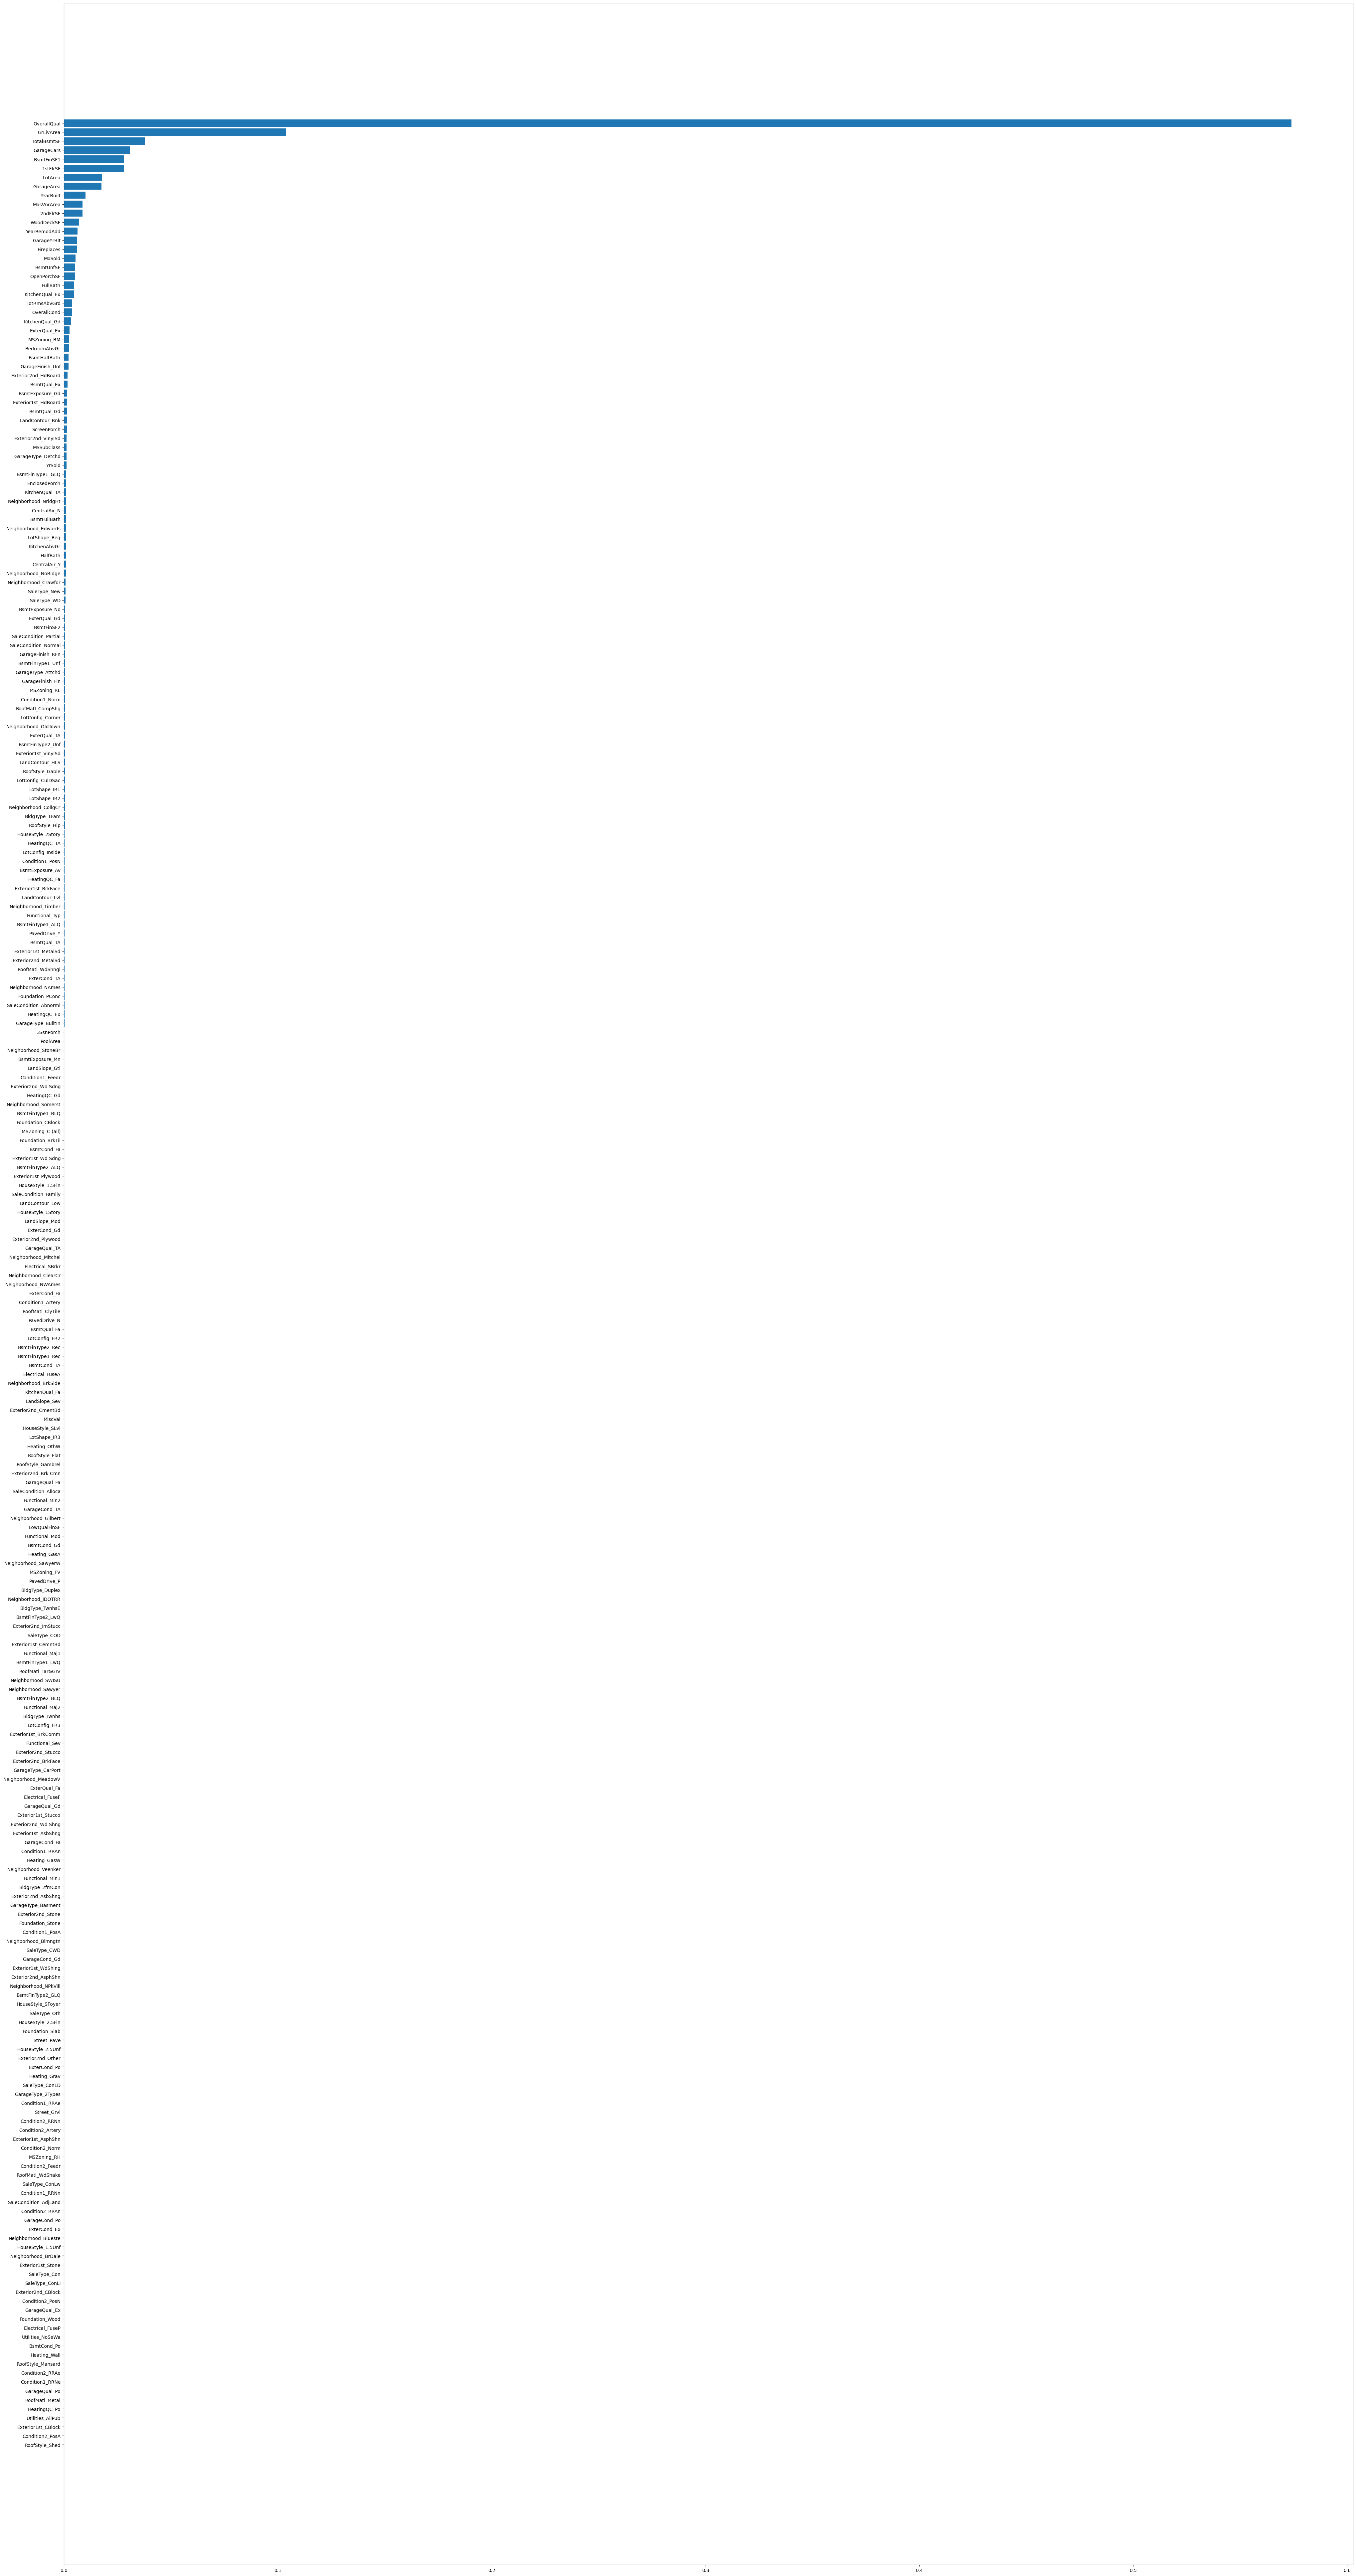

In [34]:
# plot the rf feature importantance
rf_import= pd.Series(rf_model.feature_importances_, index= x_train_encoded.columns).sort_values()

fig1= plt.figure(figsize= (50, 100))
#ax1= fig1.get_gca()
plt.barh(rf_import.index, rf_import)
#plt.xticks(x_train_encoded.columns, labels= x_train_encoded.columns)

In [35]:
# make the xgboost model
xg_model= xgboost.XGBRegressor(random_state= 24)

# fit the model
xg_model.fit(x_train_encoded, y_train)

# predict training
xg_train_pred= xg_model.predict(x_train_encoded)

# predict val
xg_val_pred= xg_model.predict(x_val_encoded)


#evaluate train and val
xg_train= rmse_fn('xg_train', y_train, xg_train_pred)
xg_val= rmse_fn('xg_val', y_val, xg_val_pred)

# add results to the df
temp_df3= pd.concat([xg_train, xg_val], axis= 1)
compare_df= pd.concat([compare_df, temp_df3], axis= 0)

print(xg_train)
print('-' * 90)
print(xg_val)
print('-' * 90)
print(compare_df)

      Model         RMSE  RMSE of log
0  xg_train  1202.341037     0.008358
------------------------------------------------------------------------------------------
    Model          RMSE  RMSE of log
0  xg_val  31094.736811     0.143657
------------------------------------------------------------------------------------------
       Model          RMSE  RMSE of log    Model          RMSE  RMSE of log
0   dt_train      0.000000     0.000000   dt_val  35699.960243     0.206488
0  bag_train  13565.019786     0.073884  bag_val  31828.376363     0.151262
0   rf_train  11375.438321     0.060031   rf_val  31781.064957     0.146518
0   xg_train   1202.341037     0.008358   xg_val  31094.736811     0.143657


In [36]:
# try to optimize random forest with gridsearchcv

# parameters to try
param_grid1= {'n_estimators':[100, 200, 300, 500, 750, 900], 'max_features':['sqrt', 0.5, 0.6, 0.8, 1.0]}

# define grid search
grid_rf= GridSearchCV(estimator= RandomForestRegressor(random_state= 24), param_grid= param_grid1, cv= 5, scoring= 'neg_mean_squared_error')

# fit model
grid_rf.fit(x_train_encoded, y_train)

# find optimized parameters
rf_param1= grid_rf.best_params_['max_features']
rf_param2= grid_rf.best_params_['n_estimators']

print('Best parameters for random forest:{}'.format(grid_rf.best_params_))
print('Best score for random forest:{}'.format(grid_rf.best_score_))

Best parameters for random forest:{'max_features': 0.5, 'n_estimators': 900}
Best score for random forest:-885539650.6331174


In [37]:
# make tuned random forest using grid search parameters

rf_opt= RandomForestRegressor(n_estimators= rf_param2, max_features= rf_param1, random_state= 24)

# fit optimized random forest on training
rf_opt.fit(x_train_encoded, y_train)

# predict training
rf_opt_train_pred= rf_opt.predict(x_train_encoded)

# predict validation
rf_opt_val_pred= rf_opt.predict(x_val_encoded)

# evaluate rf_opt
#evaluate train and val
rf_opt_train= rmse_fn('rf_opt_train', y_train, rf_opt_train_pred)
rf_opt_val= rmse_fn('rf_opt_val', y_val, rf_opt_val_pred)

# add results to dataframe
temp_df4= pd.concat([rf_opt_train, rf_opt_val], axis= 1)
compare_df= pd.concat([compare_df, temp_df4], axis= 0)

print(rf_opt_train)
print('-' * 90)
print(rf_opt_val)
print('-' * 90)
print(compare_df)

          Model          RMSE  RMSE of log
0  rf_opt_train  11059.544378     0.058792
------------------------------------------------------------------------------------------
        Model          RMSE  RMSE of log
0  rf_opt_val  30304.988901     0.147027
------------------------------------------------------------------------------------------
          Model          RMSE  RMSE of log       Model          RMSE  \
0      dt_train      0.000000     0.000000      dt_val  35699.960243   
0     bag_train  13565.019786     0.073884     bag_val  31828.376363   
0      rf_train  11375.438321     0.060031      rf_val  31781.064957   
0      xg_train   1202.341037     0.008358      xg_val  31094.736811   
0  rf_opt_train  11059.544378     0.058792  rf_opt_val  30304.988901   

   RMSE of log  
0     0.206488  
0     0.151262  
0     0.146518  
0     0.143657  
0     0.147027  


In [38]:
# try to optimize xgboost with gridsearchcv

# parameters to try
param_grid2= {'n_estimators': list(np.arange(150, 900, 150)), 'eta':[0.001, 0.005, 0.01, 0.02, 0.03], 
             'max_depth': [3, 4, 5, 6, 7]}

# define grid search
grid_xg= GridSearchCV(estimator= xgboost.XGBRegressor(random_state= 24), param_grid= param_grid2, cv= 5, scoring= 'neg_mean_squared_error')

# fit model
grid_xg.fit(x_train_encoded, y_train)

xg_trees= grid_xg.best_params_['n_estimators']
xg_eta= grid_xg.best_params_['eta']
xg_depth= grid_xg.best_params_['max_depth']

print('Best parameters for xgboost:{}'.format(grid_xg.best_params_))
print('Best score for xgboost:{}'.format(grid_xg.best_score_))

Best parameters for xgboost:{'eta': 0.03, 'max_depth': 3, 'n_estimators': 750}
Best score for xgboost:-784259783.4815966


In [39]:
# fit and evaluate optimized xgboost using parameters from grid search

xg_opt= xgboost.XGBRegressor(n_estimators= xg_trees, eta= xg_eta, max_depth= xg_depth, random_state= 24)

xg_opt.fit(x_train_encoded, y_train)

# performance on training
xg_opt_train_pred= xg_opt.predict(x_train_encoded)
xg_opt_train= rmse_fn('xg_opt_train', y_train, xg_opt_train_pred)

# performance on validation
xg_opt_val_pred= xg_opt.predict(x_val_encoded)
xg_opt_val= rmse_fn('xg_opt_val', y_val, xg_opt_val_pred)

# add results to df
temp_df5= pd.concat([xg_opt_train, xg_opt_val], axis= 1)
compare_df= pd.concat([compare_df, temp_df5], axis= 0)

print(xg_opt_train)
print('-' * 75)
print(xg_opt_val)
print('-' * 75)
print(compare_df)


          Model          RMSE  RMSE of log
0  xg_opt_train  11476.542655     0.068737
---------------------------------------------------------------------------
        Model          RMSE  RMSE of log
0  xg_opt_val  26122.593544     0.131409
---------------------------------------------------------------------------
          Model          RMSE  RMSE of log       Model          RMSE  \
0      dt_train      0.000000     0.000000      dt_val  35699.960243   
0     bag_train  13565.019786     0.073884     bag_val  31828.376363   
0      rf_train  11375.438321     0.060031      rf_val  31781.064957   
0      xg_train   1202.341037     0.008358      xg_val  31094.736811   
0  rf_opt_train  11059.544378     0.058792  rf_opt_val  30304.988901   
0  xg_opt_train  11476.542655     0.068737  xg_opt_val  26122.593544   

   RMSE of log  
0     0.206488  
0     0.151262  
0     0.146518  
0     0.143657  
0     0.147027  
0     0.131409  


In [40]:
# best model is optimized xgboost

y_final= xg_opt.predict(x_test_encoded)

y_final= y_final.reshape(len(y_final), 1)
y_final= pd.DataFrame(y_final)
id_test= id_test.values.reshape(len(id_test), 1)
id_test= pd.DataFrame(id_test)
print(y_final, id_test)

finaldf= pd.concat([id_test, y_final], axis= 1)
finaldf.columns= ['Id', 'SalePrice']
finaldf.head(20)

                  0
0     123124.343750
1     162578.843750
2     181827.640625
3     184878.312500
4     185868.390625
...             ...
1454   79956.265625
1455   79860.570312
1456  154640.906250
1457  121358.765625
1458  239968.593750

[1459 rows x 1 columns]          0
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]


,Id,SalePrice
0,1461,123124.343750
1,1462,162578.843750
2,1463,181827.640625
3,1464,184878.312500
4,1465,185868.390625
5,1466,178334.890625
6,1467,167479.718750
7,1468,161556.156250
8,1469,185409.531250
9,1470,132745.578125


In [41]:
# export the file
finaldf.to_csv('/kaggle/working/submission.csv', index= False)